In [110]:
sto = '/home/luotao/hp/tp/a.sto'
with open(sto) as f:
    f = f.readlines()

In [111]:
def getGrade(a,b):
    dic = {'A':0,'G':1,'C':2,'T':3,'U':3}  # 碱基字典 方便查找计分矩阵
    
    #创建A G C T 对应的键值对，方便查找计分矩阵中对应的得分
    grade = np.matrix([[0,0,0,1],
                       [0,0,1.5,0.8],
                       [0,1.5,0,0],
                       [1,0.8,0,0]])  # 打分矩阵grade
    return grade[dic[a],dic[b]]


def createMark(seq1,seq2):
    seq1_len = len(seq1)                         #获取序列长度a,b
    seq2_len = len(seq2)
    mark = np.zeros((seq1_len,seq2_len))         #初始化全零得分矩阵
    for base1 in range(seq1_len):
        for base2 in range(seq2_len):
            if seq1[base1] not in ['A','G','C','T','U'] or seq2[base2] not in ['A','G','C','T','U']:
                mark[base1,base2] = 0
            else:
                mark[base1,base2] = getGrade(seq1[base1],seq2[base2])
    return mark

num = 0
for line in f:
    if '#' != line[:1] and '\n' != line[:1] and '//' !=  line[:2]:
        seq = line.split()[1].replace('\n','')
        seq_len = len(seq)
        if num == 0:
            matrix_zeros = np.zeros((seq_len,seq_len))
            num += 1
        matrix = createMark(seq1=seq,seq2=seq)
        matrix_zeros += matrix

# 加入两种策略，一种是共变异时多加分
# 一种是邻近也配对时，多加分
# 看看深度学习怎么写的吧

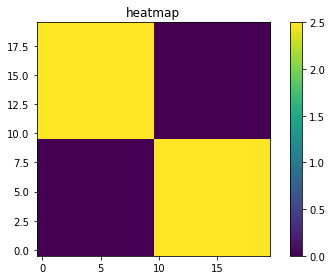

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2

In [114]:
import matplotlib.pyplot as plt
import numpy as np

harvest = matrix_zeros


plt.title("heatmap")

plt.imshow(harvest)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.colorbar() 
plt.show()

matrix_zeros

In [99]:
matrix_zeros

array([[ 0. , 15.2, 12. , ..., 22.5,  5.3,  0. ],
       [15.2,  0. , 36.9, ..., 15. , 16.5,  0. ],
       [12. , 36.9,  0. , ..., 33. , 18.5,  0. ],
       ...,
       [22.5, 15. , 33. , ...,  0. ,  9.4,  0. ],
       [ 5.3, 16.5, 18.5, ...,  9.4,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [115]:
seq1 = 'AUGGCCGGCAUGGUC-CCA--------GCCUCCUCGCUGGCGCCGGCUGGGCAACAUUCCGAA-GGGGA-CCG--U---CC-C----UC--GGUAAUGGCGAA---UGGGACCCA'
seq2 = 'AUGGCCGGCAUGGUC-CCA--------GCCUCCUCGCUGGCGCCGGCUGGGCAACAUUCCGAA-GGGGA-CCG--U---CC-C----UC--GGUAAUGGCGAA---UGGGACCCA'

def getGrade(a,b):
    dic = {'A':0,'G':1,'C':2,'T':3,'U':3}  # 碱基字典 方便查找计分矩阵
    
    #创建A G C T 对应的键值对，方便查找计分矩阵中对应的得分
    grade = np.matrix([[0,0,0,1],
                       [0,0,1.5,0.8],
                       [0,1.5,0,0],
                       [1,0.8,0,0]])  # 打分矩阵grade
    return grade[dic[a],dic[b]]

def createMark(seq1,seq2):
    seq1_len = len(seq1)                         #获取序列长度a,b
    seq2_len = len(seq2)
    mark = np.zeros((seq1_len+1,seq2_len+1))         #初始化全零得分矩阵
    for base1 in range(seq1_len):
        for base2 in range(seq2_len):
            if seq1[base1] not in ['A','G','C','T','U'] or seq2[base2] not in ['A','G','C','T','U']:
                mark[base1,base2] = 0
            else:
                mark[base1,base2] = getGrade(seq1[base1],seq2[base2])
    return mark

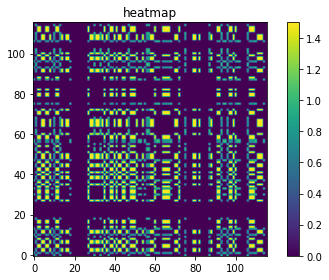

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2.5, 2.5,
        2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.5, 2

In [116]:
import matplotlib.pyplot as plt
import numpy as np

harvest = createMark(seq1,seq2)


plt.title("heatmap")

plt.imshow(harvest)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.colorbar() 
plt.show()

matrix_zeros

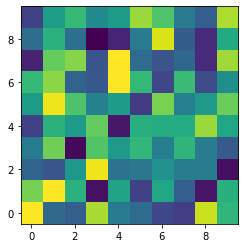

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
data = np.random.rand(10, 10)

# 绘制热图
plt.imshow(data)

# 反向y轴
plt.gca().invert_yaxis()

# 显示图像
plt.show()

In [131]:
file = "/home/luotao/c_elegans/RNA-seq/SRA_yy/sra_result.csv"
import csv,os

with open(file) as f:
    reader = csv.reader(f)
    for i in reader:
        print(i[7],i[13],sep='+')

        print(os.listdir('/home/luotao/c_elegans/RNA-seq/SRA_yy/sma-2(rax5)-1/'))

Sample Accession+Library Name
[]
SRS2370468+sma-4(rax3)-1
[]
SRS2370464+sma-2(rax5)-1
[]
SRS2370465+sma-2(rax5)-2
[]
SRS2370463+sma-4(rax3)-2
[]
SRS2370462+sma-4(rax3)-3
[]
SRS2370461+sma-2(rax5)-3
[]
